In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data\Mumbai_restaurants.csv') .iloc[:,1:]

In [2]:
df.head()

,Name,Rating,Specials,Delivery time,Cost,Coupons
0,Huber And Holly,5.0,"Ice Cream, Desserts",61 MINS,₹200 FOR TWO,50% off | Use WELCOME50
1,Apna Food Court,5.0,"Chinese, Continental",45 MINS,₹450 FOR TWO,50% off | Use WELCOME50
2,abCoffee,5.0,"Beverages, Bakery",41 MINS,₹200 FOR TWO,50% off | Use WELCOME50
3,OG Juices - Cold Pressed Juices,4.9,Juices,63 MINS,₹200 FOR TWO,50% off | Use WELCOME50
4,Spicy Mango,4.9,"South Indian, Sri Lankan, Asian",63 MINS,₹400 FOR TWO,50% off | Use WELCOME50


In [3]:
df.tail()

,Name,Rating,Specials,Delivery time,Cost,Coupons
46,Shaolin Monks,4.6,"Asian, Chinese, Thai, Oriental",67 MINS,₹500 FOR TWO,50% off | Use WELCOME50
47,Wraps and Rolls,4.6,"Fast Food, Healthy Food",61 MINS,₹250 FOR TWO,50% off | Use WELCOME50
48,House of Momo,4.6,"Chinese, Asian",58 MINS,₹350 FOR TWO,50% off | Use WELCOME50
49,99 East,4.6,"North Indian, Chinese, Seafood",55 MINS,₹300 FOR TWO,50% off | Use WELCOME50
50,Agrawals juice and fast food centre,4.6,Indian,48 MINS,₹300 FOR TWO,50% off | Use WELCOME50


In [4]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Name             0
Rating           0
Specials         0
Delivery time    0
Cost             0
Coupons          0
dtype: int64


In [5]:
average_rating = df["Rating"].mean()
print("Average Rating:", average_rating)


Average Rating: 4.762745098039216


In [6]:
most_common_specials = df["Specials"].value_counts().idxmax()
print("Most Common Specials:", most_common_specials)

Most Common Specials: Ice Cream, Desserts


In [7]:
df["Delivery time"] = df["Delivery time"].astype(str)

df["Delivery Time (Minutes)"] = df["Delivery time"].str.extract(r"(\d+)").astype(float)
average_delivery_time = df["Delivery Time (Minutes)"].mean()
print("Average Delivery Time (in minutes):", average_delivery_time)


Average Delivery Time (in minutes): 49.6078431372549


In [8]:
df["Cost for Two"] = df["Cost"].str.extract(r"₹(\d+)").astype(int)
average_cost_for_two = df["Cost for Two"].mean()
print("Average Cost for Two (in rupees):", average_cost_for_two)

Average Cost for Two (in rupees): 412.3333333333333


In [9]:
most_common_coupons = df["Coupons"].value_counts().idxmax()
print("Most Common Coupons:", most_common_coupons)

Most Common Coupons: 50% off | Use WELCOME50


In [10]:
highest_rated_restaurant = df[df["Rating"] == df["Rating"].max()]["Name"].values[0]
print("Restaurant with Highest Rating:", highest_rated_restaurant)

Restaurant with Highest Rating: Huber And Holly


In [11]:
lowest_rated_restaurant = df[df["Rating"] == df["Rating"].min()]["Name"].values[0]
print("Restaurant with Lowest Rating:", lowest_rated_restaurant)

Restaurant with Lowest Rating: Sadguru Sandwiches centre


In [12]:
df["Discount Percentage"] = df["Coupons"].str.extract(r"(\d+)% off").astype(int)
average_discount_percentage = df["Discount Percentage"].mean()
print("Average Discount Percentage:", average_discount_percentage)

Average Discount Percentage: 50.3921568627451


In [13]:
df["Discounted Cost for Two"] = df["Cost for Two"] * (1 - df["Discount Percentage"] / 100)
average_discounted_cost_for_two = df["Discounted Cost for Two"].mean()
print("Average Discounted Cost for Two (in rupees):", average_discounted_cost_for_two)

Average Discounted Cost for Two (in rupees): 204.00980392156862


In [14]:
df["Specials Only"] = df["Specials"].str.split(", ")
specials_count = df["Specials Only"].value_counts()
print("Number of Restaurants by Specials:\n", specials_count)

Number of Restaurants by Specials:
 Specials Only
[Ice Cream, Desserts]                                                                 2
[Juices]                                                                              2
[Bakery, Desserts]                                                                    2
[Japanese, Asian]                                                                     2
[Italian, Asian, American, Indian]                                                    1
[North Indian, Chinese]                                                               1
[Healthy Food]                                                                        1
[Desserts, Snacks, Sweets]                                                            1
[South Indian, Indian]                                                                1
[Healthy Food, Salads, Keto]                                                          1
[North Indian, Punjabi]                                               

In [15]:
df["Specials"] = df["Specials"].str.split(", ")
df = df.explode("Specials")

average_rating_by_specials = df.groupby("Specials")["Rating"].mean()
print("Average Rating by Specials:\n", average_rating_by_specials)

Average Rating by Specials:
 Specials
American           4.800000
Arabian            4.800000
Asian              4.712500
Bakery             4.812500
Beverages          4.800000
Burgers            4.900000
Cafe               4.900000
Chinese            4.725000
Continental        4.833333
Desserts           4.786667
Fast Food          4.750000
Healthy Food       4.675000
Ice Cream          4.840000
Ice Cream Cakes    4.700000
Indian             4.742857
Italian            4.740000
Japanese           4.700000
Juices             4.766667
Kebabs             4.800000
Keto               4.700000
Lebanese           4.800000
Mediterranean      4.800000
Middle Eastern     4.800000
Nepalese           4.700000
North Eastern      4.700000
North Indian       4.700000
Oriental           4.600000
Paan               4.800000
Pastas             4.800000
Pizzas             4.850000
Punjabi            4.700000
Salads             4.733333
Seafood            4.600000
Snacks             4.770000
South Indi

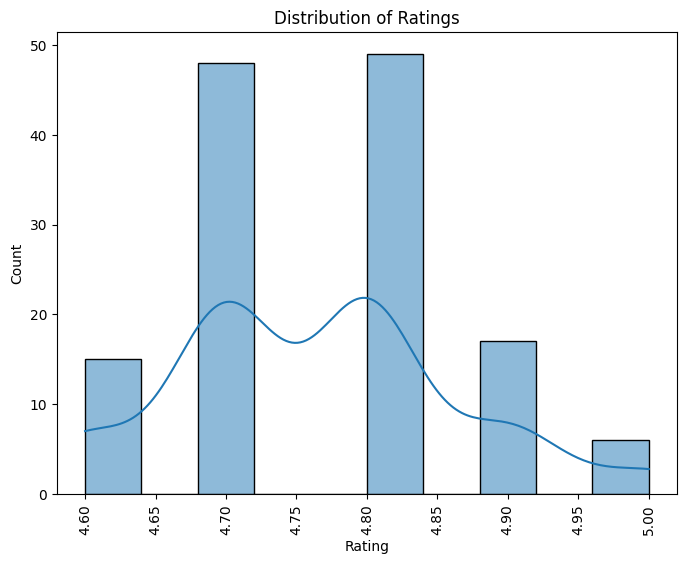

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(df["Rating"], bins=10, kde=True)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.xticks(rotation=90)
plt.show()

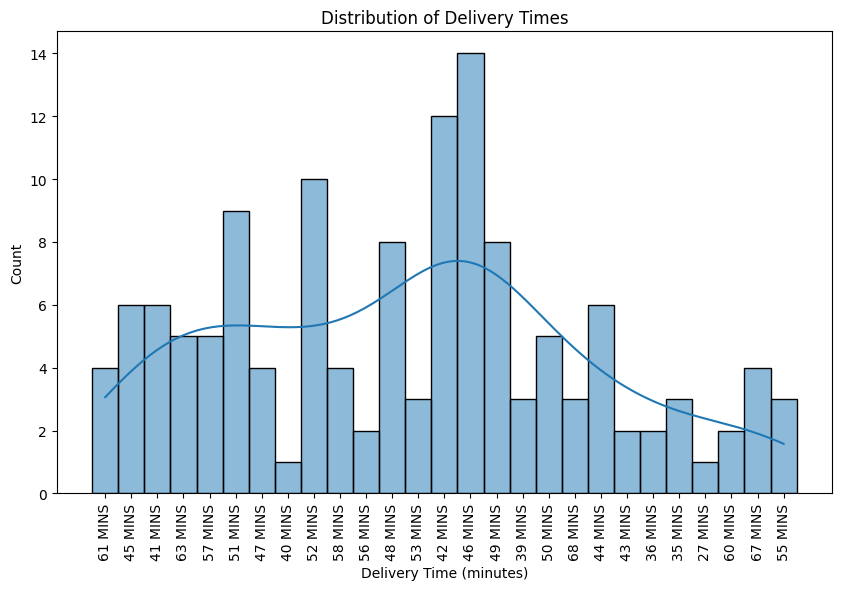

In [17]:
#df["Delivery time"] = df["Delivery time"].str.replace(" MINS", "").astype(int)
plt.figure(figsize=(10, 6))
sns.histplot(df["Delivery time"], bins=10, kde=True)

plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Count")
plt.title("Distribution of Delivery Times")
plt.xticks(rotation = 90)
plt.show()

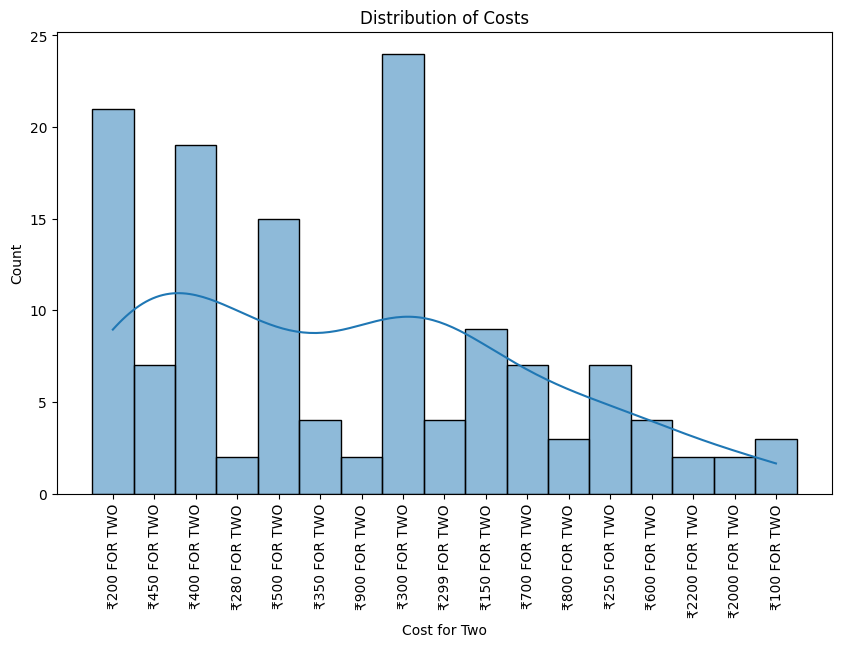

In [18]:
# Plot distribution of costs
plt.figure(figsize=(10, 6))
sns.histplot(df["Cost"], bins=10, kde=True)
plt.xlabel("Cost for Two")
plt.ylabel("Count")
plt.title("Distribution of Costs")
plt.xticks(rotation=90)
plt.show()

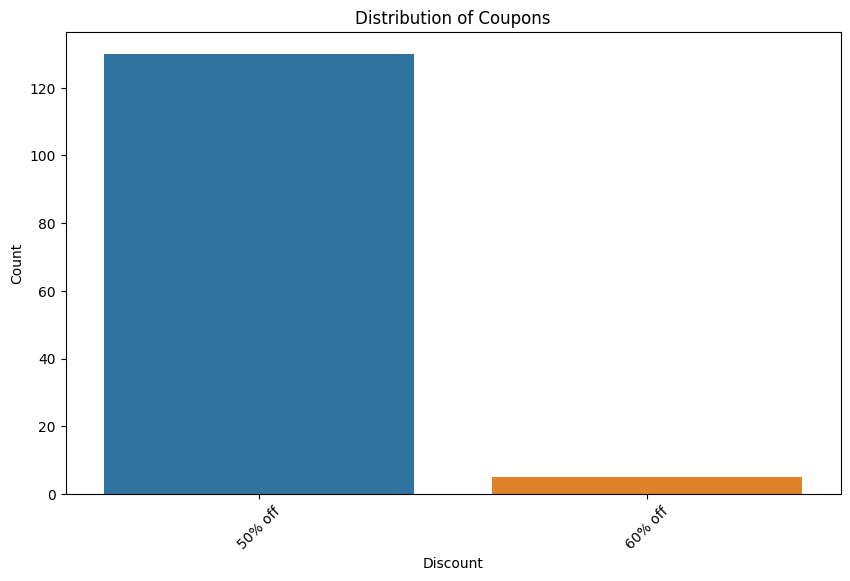

In [19]:
# Extract discount percentage from "Coupons" column and create a new "Discount" column
df["Discount"] = df["Coupons"].str.extract(r"(\d+% off)").fillna("No Coupon")

# Plot distribution of coupons
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Discount")
plt.xticks(rotation=45)
plt.xlabel("Discount")
plt.ylabel("Count")
plt.title("Distribution of Coupons")
plt.show()


In [1]:
import seaborn as sns
